In [1]:
import glob
import os


In [2]:
#Pip install method (recommended)
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()
from ultralytics import YOLO

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.9/78.2 GB disk)


In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

In [4]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet
from roboflow import Roboflow
rf = Roboflow(api_key="H5L4o6QYmsjqgIjoiA5J")
project = rf.workspace("ic-hk4j8").project("ddot-rctl7")
version = project.version(1)
dataset = version.download("yolov8")

mkdir: cannot create directory ‘{HOME}/datasets’: No such file or directory
[Errno 2] No such file or directory: '{HOME}/datasets'
/content
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.9/74.9 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.2 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to DDOT-1 in yolov8:: 100%|██████████| 66/66 [00:00<00:00, 5238.71it/s]


In [5]:
from ultralytics import YOLO

In [6]:
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=10 imgsz=640 freeze=21 plots=True

100% 21.5M/21.5M [00:00<00:00, 140MB/s] 
New https://pypi.org/project/ultralytics/8.2.18 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/DDOT-1/data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=21, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=Non

In [7]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/DDOT-1/valid/labels.cache... 5 images, 0 backgrounds, 0 corrupt: 100% 5/5 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:01<00:00,  1.15s/it]
                   all          5       1752       0.23       0.11      0.137     0.0699
        Developed_land          5       1314      0.187      0.212      0.134     0.0505
      Undeveloped_land          5        438      0.273    0.00685      0.141     0.0892
Speed: 0.3ms preprocess, 20.4ms inference, 0.0ms loss, 131.3ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [8]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt source={dataset.location}/test/images save=True

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

image 1/5 /content/DDOT-1/test/images/-_png.rf.189a986718186b2211ae9ee3f89690b9.jpg: 640x640 204 Developed_lands, 1 Undeveloped_land, 16.3ms
image 2/5 /content/DDOT-1/test/images/-_png.rf.a258be03a2c63ddcdee63e782b2e4566.jpg: 640x640 202 Developed_lands, 16.4ms
image 3/5 /content/DDOT-1/test/images/-_png.rf.bf807b34ebf640db072d754592e047a4.jpg: 640x640 154 Developed_lands, 3 Undeveloped_lands, 16.3ms
image 4/5 /content/DDOT-1/test/images/-_png.rf.d40009ff9095674be29aea9aebc09449.jpg: 640x640 300 Developed_lands, 16.3ms
image 5/5 /content/DDOT-1/test/images/-_png.rf.e2d6ccd71a0aff3ab028955c07cfdd89.jpg: 640x640 71 Developed_lands, 16.5ms
Speed: 2.0ms preprocess, 16.4ms inference, 114.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/mode

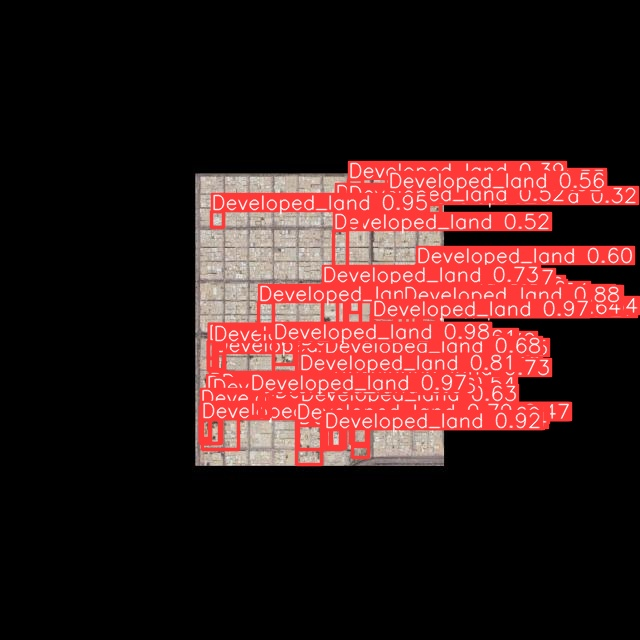

-_png.rf.e2d6ccd71a0aff3ab028955c07cfdd89.jpg


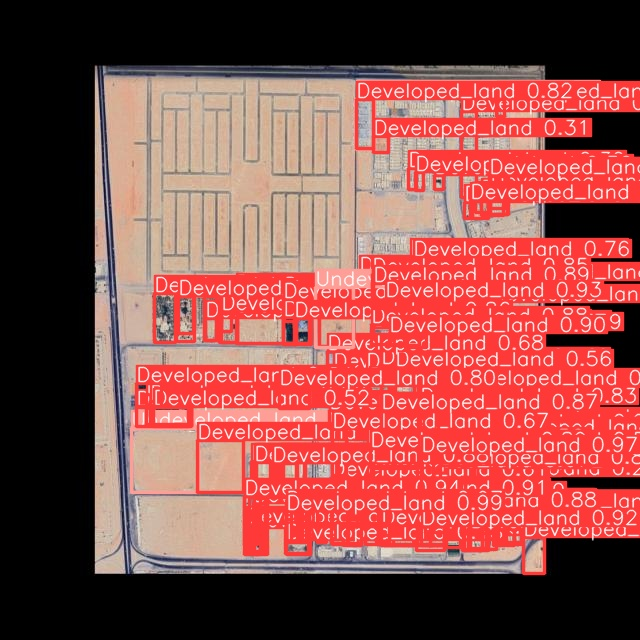

-_png.rf.bf807b34ebf640db072d754592e047a4.jpg


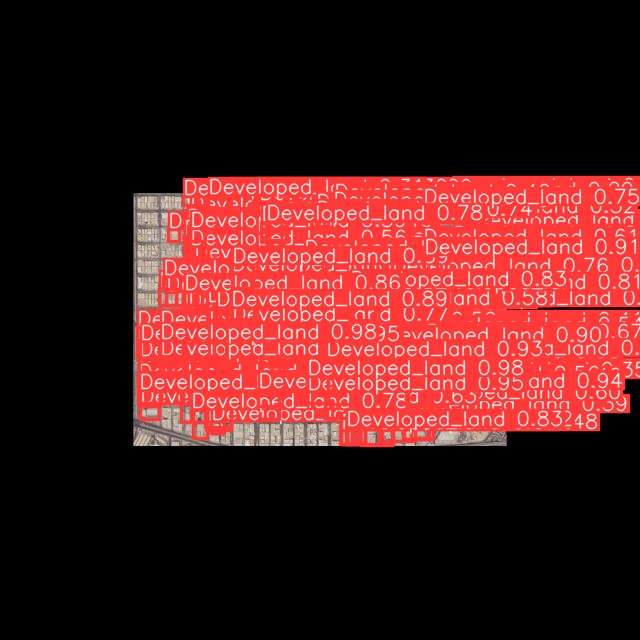

-_png.rf.a258be03a2c63ddcdee63e782b2e4566.jpg


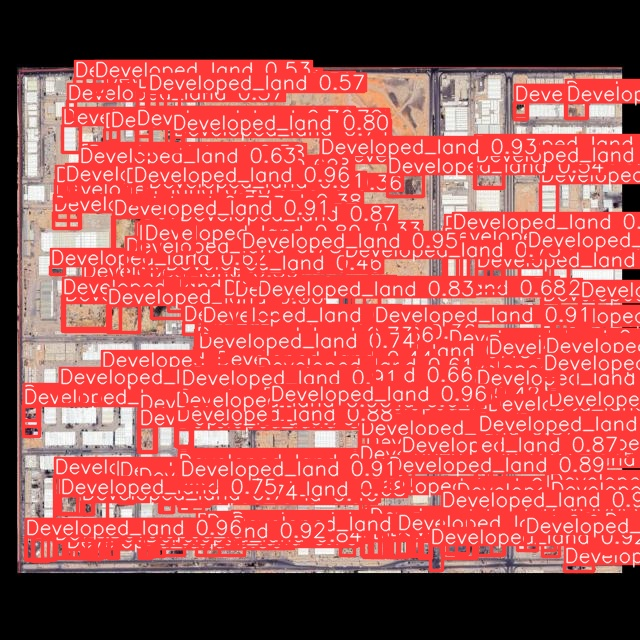

-_png.rf.d40009ff9095674be29aea9aebc09449.jpg


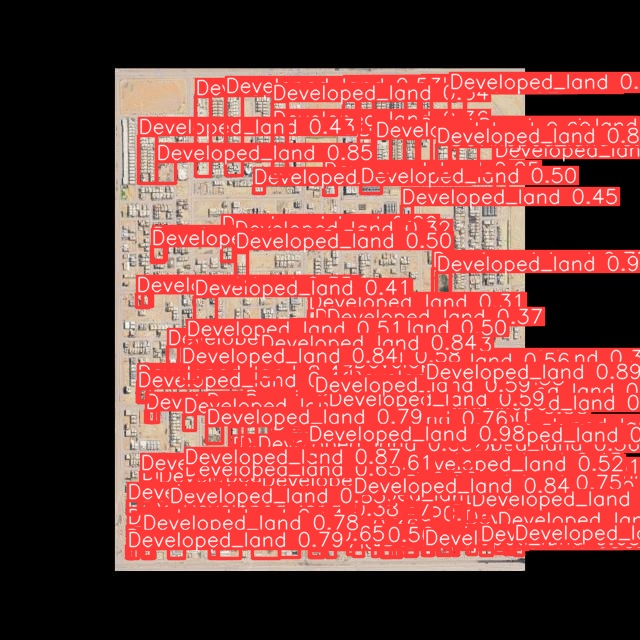

-_png.rf.189a986718186b2211ae9ee3f89690b9.jpg


In [14]:
from IPython.display import display, Image
validation_pred_data_path = 'runs/detect/predict'
imgs = os.listdir(validation_pred_data_path)
for i in range(5) :
  display(Image(os.path.join(validation_pred_data_path,imgs[i]), width=500))
  print(imgs[i])